## Code for comparing the ellipticity of halos with and without adaptive envelope

In [1]:
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from tools.plot_utils import plot_pretty
plot_pretty()
%matplotlib inline

import sys
sys.path.append('/home/zzbenjamin94/Desktop/Astronomy/Research/DES_Galaxy_Cluster')
from mpl_toolkits.mplot3d import Axes3D
from tools.setup.setup import tools_home_dir, home_dir
import pyfits
datadir = home_dir()+'output/buzzard/halo_shape/'
toolsdir = tools_home_dir()

import astropy.io.fits as pyfits
import ConfigParser
import healpy as hp
import treecorr
import os

### Extracting Shape Parameters

Without adaptive envelope

In [3]:
from repo.halo_shape.read_shape_param import read_shape_param

filename = 'halo_shape_allz.npy'
q_noadapt, s_noadapt, cos_i_noadapt, halos_M_noadapt, halos_ID_noadapt =  read_shape_param(datadir+filename)

With adaptive envelope

In [4]:
filename = 'halo_shape_allz_adapt.npy'
q, s, cos_i, halos_M, halos_ID =  read_shape_param(datadir+filename)

## Quantifying Edge Bias
Compare the ellipticity of halos before and after adjusting for edge bias.
Use the redMapper data. 

In [6]:
#How to sort the halos by ID?
#Brute force!
halos_ID_match = []
for i, halo_ID in enumerate(halos_ID):
    if halo_ID in halos_ID_noadapt:
        halos_ID_match.append(halo_ID)
        
dummy_ID = []
for i in range(len(halos_ID_match)):
    dummy = np.where(halos_ID == halos_ID_match[i])[0]
    if len(dummy) != 0:
        dummy_ID.append(dummy)
        
q_adapt_match = q[dummy_ID]; s_adapt_match = s[dummy_ID]

dummy_ID = []
for i in range(len(halos_ID_match)):
    dummy = np.where(halos_ID_noadapt == halos_ID_match[i])[0]
    if len(dummy) != 0:
        dummy_ID.append(dummy)

q_noadapt_match = q_noadapt[dummy_ID]; s_noadapt_match = s_noadapt[dummy_ID]

##### Plotting the edge bias

In [7]:
bin_num = 30
q_hist, q_bins = np.histogram(q_adapt_match,bin_num)
q_noadapt_mean = np.zeros(bin_num)
q_noadapt_err = np.zeros(bin_num)
for i in range(bin_num):
    q_bin_ind = np.where((q_adapt_match > q_bins[i]) & (q_adapt_match < q_bins[i+1]))
    if len(q_bin_ind[0]) > 0:
        q_bin = q_noadapt_match[q_bin_ind]
        q_noadapt_mean[i] = np.mean(q_bin)
        q_noadapt_err[i] = np.std(q_bin)
        
    else:
        raise Exception("No samples in bin from {} to {}".format(q_bins[i], q_bins[i+1]))
        
        
s_hist, s_bins = np.histogram(s_adapt_match,bin_num)
s_noadapt_mean = np.zeros(bin_num)
s_noadapt_err = np.zeros(bin_num)
for i in range(bin_num):
    s_bin_ind = np.where((s_adapt_match > s_bins[i]) & (s_adapt_match < s_bins[i+1]))
    if len(s_bin_ind[0]) > 0:
        s_bin = s_noadapt_match[s_bin_ind]
        s_noadapt_mean[i] = np.mean(s_bin)
        s_noadapt_err[i] = np.std(s_bin)
        
    else:
        raise Exception("No samples in bin from {} to {}".format(s_bins[i], s_bins[i+1]))

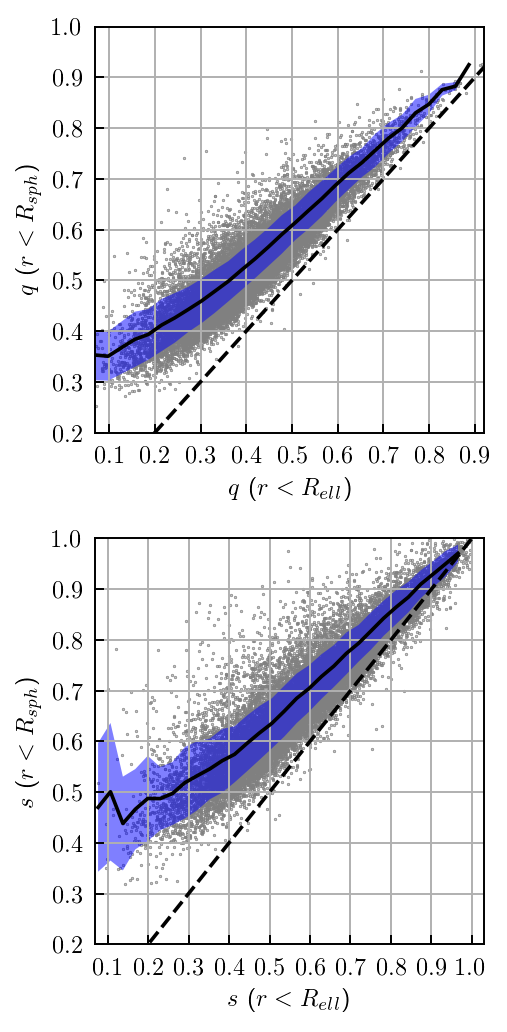

In [10]:
x = np.linspace(0,1,100)
fig, axs = plt.subplots(2, 1, tight_layout=True, figsize=(3,6))
#q parameter
axs[0].scatter(q_adapt_match, q_noadapt_match, s=0.1, color='gray')
axs[0].plot(x,x, linestyle='dashed', color='black')
axs[0].fill_between(q_bins[0:-1], q_noadapt_mean-q_noadapt_err, q_noadapt_mean+q_noadapt_err,
                       facecolor='blue', interpolate=True, alpha=0.5)
axs[0].plot(q_bins[0:-1],q_noadapt_mean, linestyle='solid', color = 'black')
axs[0].grid()
axs[0].set_ylabel(r"$q$ ($r < R_{sph}$) ")
axs[0].set_xlabel(r"$q$ ($r < R_{ell}$) ")
axs[0].set_xticks(np.arange(0.0,1.1,step=0.1))
axs[0].set_ylim((0.2,1))
axs[0].set_xlim((0.07,0.92))

#s parameter
axs[1].scatter(s_adapt_match, s_noadapt_match, s=0.1, color='gray')
axs[1].plot(x,x, linestyle='dashed', color='black')
axs[1].fill_between(s_bins[0:-1], s_noadapt_mean-s_noadapt_err, s_noadapt_mean+s_noadapt_err,
                       facecolor='blue', interpolate=True, alpha=0.5)
axs[1].plot(s_bins[0:-1],s_noadapt_mean, linestyle='solid', color = 'black')
axs[1].grid()
axs[1].set_ylabel(r"$s$ ($r < R_{sph}$) ")
axs[1].set_xlabel(r"$s$ ($r < R_{ell}$) ")
axs[1].set_xticks(np.arange(0.0,1.1,step=0.1))
axs[1].set_ylim((0.2,1))
axs[1].set_xlim((0.07,1.03))
#plt.savefig('edge_bias_060818.png')
plt.show()